<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_data(y_hat)_add_delta_(0_4)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_0.4'

In [4]:
os.listdir(base_path)

['data_add_delta_0.4_n20.csv',
 'data_add_delta_0.4_n30.csv',
 'data_add_delta_0.4_n60.csv',
 'data_add_delta_0.4_n120.csv',
 'data_add_delta_0.4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_0.4_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,43.397732,68.596157,89.282447,30.421720,3.133578,244.831634,241.514006,3.317628
1,0.0,1.0,83.294725,35.671147,43.165323,90.225260,-3.117827,259.238627,261.721864,-2.483237
2,0.0,2.0,65.939362,34.549509,42.750636,83.048925,0.189752,236.478184,235.932241,0.545942
3,0.0,3.0,72.296970,33.827723,97.953638,22.067344,1.223079,237.368754,235.702166,1.666588
4,0.0,4.0,55.555330,21.652133,87.101326,30.547599,1.273335,206.129723,204.681361,1.448362
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,50.313073,25.701688,46.212330,42.388692,-2.606083,172.009700,175.882344,-3.872644
59996,999.0,56.0,41.026724,93.513932,74.700442,21.871653,0.734634,241.847386,241.143926,0.703460
59997,999.0,57.0,90.935659,33.549845,25.946182,96.950207,0.288998,257.670892,257.830392,-0.159501
59998,999.0,58.0,23.123742,48.312525,61.714003,31.090371,2.458865,176.699505,175.431091,1.268415


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,43.397732,68.596157,89.282447,30.421720,3.133578,244.831634,241.514006,3.317628
1,0.0,1.0,83.294725,35.671147,43.165323,90.225260,-3.117827,259.238627,261.721864,-2.483237
2,0.0,2.0,65.939362,34.549509,42.750636,83.048925,0.189752,236.478184,235.932241,0.545942
3,0.0,3.0,72.296970,33.827723,97.953638,22.067344,1.223079,237.368754,235.702166,1.666588
4,0.0,4.0,55.555330,21.652133,87.101326,30.547599,1.273335,206.129723,204.681361,1.448362
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,50.313073,25.701688,46.212330,42.388692,-2.606083,172.009700,175.882344,-3.872644
59996,999.0,56.0,41.026724,93.513932,74.700442,21.871653,0.734634,241.847386,241.143926,0.703460
59997,999.0,57.0,90.935659,33.549845,25.946182,96.950207,0.288998,257.670892,257.830392,-0.159501
59998,999.0,58.0,23.123742,48.312525,61.714003,31.090371,2.458865,176.699505,175.431091,1.268415


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    43.397732  68.596157  89.282447  30.421720  3.133578  244.831634   
      1.0    83.294725  35.671147  43.165323  90.225260 -3.117827  259.238627   
      2.0    65.939362  34.549509  42.750636  83.048925  0.189752  236.478184   
      3.0    72.296970  33.827723  97.953638  22.067344  1.223079  237.368754   
      4.0    55.555330  21.652133  87.101326  30.547599  1.273335  206.129723   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   50.313073  25.701688  46.212330  42.388692 -2.606083  172.009700   
      56.0   41.026724  93.513932  74.700442  21.871653  0.734634  241.847386   
      57.0   90.935659  33.549845  25.946182  96.950207  0.288998  257.670892   
      58.0   23.123742  48.312525  61.714003  31.090371  2.458865  176.699505   
      59.0   56.635370  66.915720  52.673233  72.200259  2.246190  260.670772   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    241.514006  3.317628  
      1.0    261.721864 -2.483237  
      2.0    235.932241  0.545942  
      3.0    235.702166  1.666588  
      4.0    204.681361  1.448362  
...                 ...       ...  
999.0 55.0   175.882344 -3.872644  
      56.0   241.143926  0.703460  
      57.0   257.830392 -0.159501  
      58.0   175.431091  1.268415  
      59.0   258.683478  1.987294  

[60000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    43.397732  68.596157  89.282447  30.421720  3.133578  244.831634   
      1.0    83.294725  35.671147  43.165323  90.225260 -3.117827  259.238627   
      2.0    65.939362  34.549509  42.750636  83.048925  0.189752  236.478184   
      3.0    72.296970  33.827723  97.953638  22.067344  1.223079  237.368754   
      4.0    55.555330  21.652133  87.101326  30.547599  1.273335  206.129723   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   50.313073  25.701688  46.212330  42.388692 -2.606083  172.009700   
      56.0   41.026724  93.513932  74.700442  21.871653  0.734634  241.847386   
      57.0   90.935659  33.549845  25.946182  96.950207  0.288998  257.670892   
      58.0   23.123742  48.312525  61.714003  31.090371  2.458865  176.699505   
      59.0   56.635370  66.915720  52.673233  72.200259  2.246190  260.670772   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    241.514006  3.317628  
      1.0    261.721864 -2.483237  
      2.0    235.932241  0.545942  
      3.0    235.702166  1.666588  
      4.0    204.681361  1.448362  
...                 ...       ...  
999.0 55.0   175.882344 -3.872644  
      56.0   241.143926  0.703460  
      57.0   257.830392 -0.159501  
      58.0   175.431091  1.268415  
      59.0   258.683478  1.987294  

[60000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,43.397732,68.596157,89.282447,30.421720,3.133578,244.831634,241.514006,3.317628
1,0.0,1.0,83.294725,35.671147,43.165323,90.225260,-3.117827,259.238627,261.721864,-2.483237
2,0.0,2.0,65.939362,34.549509,42.750636,83.048925,0.189752,236.478184,235.932241,0.545942
3,0.0,3.0,72.296970,33.827723,97.953638,22.067344,1.223079,237.368754,235.702166,1.666588
4,0.0,4.0,55.555330,21.652133,87.101326,30.547599,1.273335,206.129723,204.681361,1.448362
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,50.313073,25.701688,46.212330,42.388692,-2.606083,172.009700,175.882344,-3.872644
59996,999.0,56.0,41.026724,93.513932,74.700442,21.871653,0.734634,241.847386,241.143926,0.703460
59997,999.0,57.0,90.935659,33.549845,25.946182,96.950207,0.288998,257.670892,257.830392,-0.159501
59998,999.0,58.0,23.123742,48.312525,61.714003,31.090371,2.458865,176.699505,175.431091,1.268415


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    43.397732  68.596157  89.282447  30.421720  3.133578  244.831634   
      1.0    83.294725  35.671147  43.165323  90.225260 -3.117827  259.238627   
      2.0    65.939362  34.549509  42.750636  83.048925  0.189752  236.478184   
      3.0    72.296970  33.827723  97.953638  22.067344  1.223079  237.368754   
      4.0    55.555330  21.652133  87.101326  30.547599  1.273335  206.129723   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   50.313073  25.701688  46.212330  42.388692 -2.606083  172.009700   
      56.0   41.026724  93.513932  74.700442  21.871653  0.734634  241.847386   
      57.0   90.935659  33.549845  25.946182  96.950207  0.288998  257.670892   
      58.0   23.123742  48.312525  61.714003  31.090371  2.458865  176.699505   
      59.0   56.635370  66.915720  52.673233  72.200259  2.246190  260.670772   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    241.514006  3.317628  
      1.0    261.721864 -2.483237  
      2.0    235.932241  0.545942  
      3.0    235.702166  1.666588  
      4.0    204.681361  1.448362  
...                 ...       ...  
999.0 55.0   175.882344 -3.872644  
      56.0   241.143926  0.703460  
      57.0   257.830392 -0.159501  
      58.0   175.431091  1.268415  
      59.0   258.683478  1.987294  

[60000 rows x 8 columns]

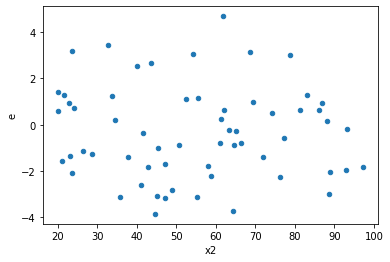

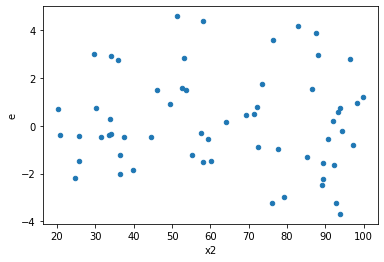

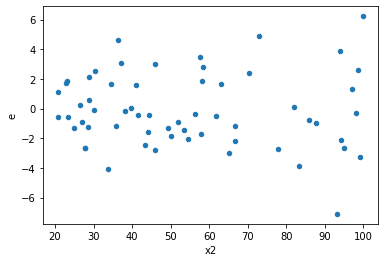

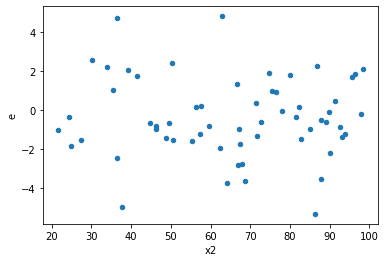

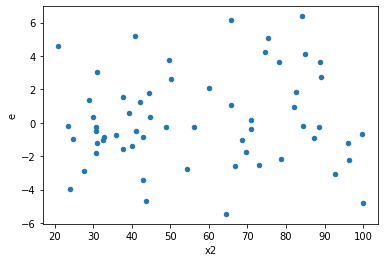

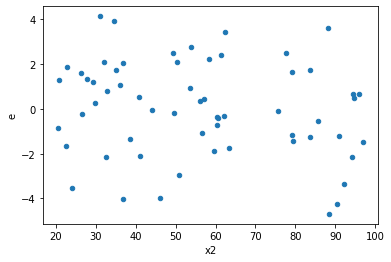

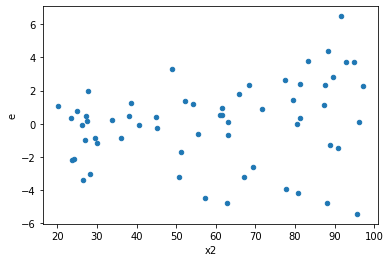

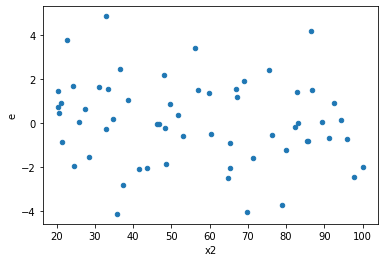

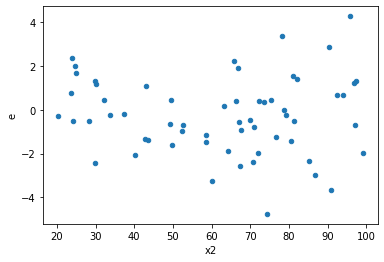

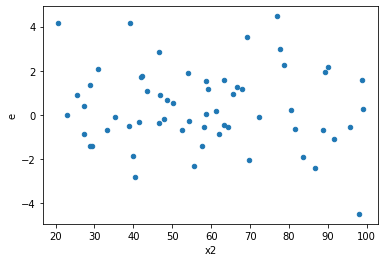

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,20.0,20.0,35.897704410005716,117.0584797491758,1.7948852205002859,5.85292398745879,3.2608904015753235,0.011066789949457423,0.9944666050252713,0.0055333949747287114,Reject001=1 : Homoscedasticity
2.0,20.0,20.0,62.715272679823585,168.96002285435844,3.1357636339911794,8.448001142717922,2.6940809731776123,0.03182285021148035,0.9840885748942598,0.015911425105740173,Reject001=1 : Homoscedasticity
4.0,20.0,20.0,100.14132812639515,198.31379295679633,5.007066406319757,9.915689647839816,1.9803391533462693,0.13498148253761166,0.9325092587311942,0.06749074126880583,Reject001=1 : Homoscedasticity
5.0,20.0,20.0,50.351522421403594,118.77199678239403,2.5175761210701797,5.938599839119702,2.358856119351538,0.061826306971699996,0.96908684651415,0.030913153485849998,Reject001=1 : Homoscedasticity
6.0,20.0,20.0,80.37115294074312,170.03089757839652,4.018557647037156,8.501544878919827,2.1155712137632103,0.10179619720546751,0.9491019013972662,0.050898098602733755,Reject001=1 : Homoscedasticity
8.0,20.0,20.0,36.9089186050668,50.1048153045984,1.8454459302533401,2.50524076522992,1.3575259638660908,0.5004969173212857,0.7497515413393572,0.2502484586606428,Reject001=1 : Homoscedasticity
13.0,20.0,20.0,81.59565568355626,114.70262398317699,4.079782784177813,5.735131199158849,1.4057442522187205,0.453078692416101,0.7734606537919495,0.2265393462080505,Reject001=1 : Homoscedasticity
18.0,20.0,20.0,109.58745573374811,141.58228947498702,5.479372786687406,7.079114473749351,1.2919570814653554,0.5721321321171191,0.7139339339414404,0.28606606605855955,Reject001=1 : Homoscedasticity
19.0,20.0,20.0,53.201999329603716,97.0837492226537,2.660099966480186,4.8541874611326845,1.8248139251532303,0.18731674415490351,0.9063416279225482,0.09365837207745176,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,20.0,20.0,87.73778240409189,68.21555025562083,4.386889120204595,3.410777512781041,0.7774934399577371,0.5788507053194273,Reject001=1 : Homoscedasticity
1.0,20.0,20.0,35.897704410005716,117.0584797491758,1.7948852205002859,5.85292398745879,3.2608904015753235,0.011066789949457423,Reject001=1 : Homoscedasticity
2.0,20.0,20.0,62.715272679823585,168.96002285435844,3.1357636339911794,8.448001142717922,2.6940809731776123,0.03182285021148035,Reject001=1 : Homoscedasticity
3.0,20.0,20.0,96.74924027317446,51.721058103193364,4.837462013658723,2.586052905159668,0.5345887777222577,0.1700478991380277,Reject001=1 : Homoscedasticity
4.0,20.0,20.0,100.14132812639515,198.31379295679633,5.007066406319757,9.915689647839816,1.9803391533462693,0.13498148253761166,Reject001=1 : Homoscedasticity
5.0,20.0,20.0,50.351522421403594,118.77199678239403,2.5175761210701797,5.938599839119702,2.358856119351538,0.061826306971699996,Reject001=1 : Homoscedasticity
6.0,20.0,20.0,80.37115294074312,170.03089757839652,4.018557647037156,8.501544878919827,2.1155712137632103,0.10179619720546751,Reject001=1 : Homoscedasticity
7.0,20.0,20.0,69.7313483729336,68.05261308766377,3.48656741864668,3.402630654383189,0.9759256729657414,0.9570840427529587,Reject001=1 : Homoscedasticity
8.0,20.0,20.0,36.9089186050668,50.1048153045984,1.8454459302533401,2.50524076522992,1.3575259638660908,0.5004969173212857,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      978
Reject001=0 : Heteroscedasticity     22
Name: Result_test, dtype: int64